In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Do a `uv sync --extra examples` to install the required dependencies
import sys
import os
sys.path.append(os.path.abspath('..'))

from yanat import generative_game_theoric as gen
from yanat import utils as ut
from vizman import viz
import netneurotools.datasets as nntd
from scipy.spatial.distance import pdist, squareform

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/.venv/lib/python3.11/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
viz.set_visual_style()
viz_sizes = viz.load_data_from_json("sizes.json")
viz_colors = viz.load_data_from_json("colors.json")
viz_cmaps = viz.give_colormaps()
sns_kwargs = {"cmap": viz_cmaps["bw_lr"],
              "xticklabels":False,
              "yticklabels":False,
              "rasterized":True}

In [4]:
human_struct = nntd.fetch_famous_gmat("human_struct_scale033")

Please cite the following papers if you are using this function:
  [primary]:
    
  [celegans]:
    Lav R Varshney, Beth L Chen, Eric Paniagua, David H Hall, and Dmitri B Chklovskii. Structural properties of the caenorhabditis elegans neuronal network. PLoS computational biology, 7(2):e1001066, 2011.
  [drosophila]:
    Ann-Shyn Chiang, Chih-Yung Lin, Chao-Chun Chuang, Hsiu-Ming Chang, Chang-Huain Hsieh, Chang-Wei Yeh, Chi-Tin Shih, Jian-Jheng Wu, Guo-Tzau Wang, Yung-Chang Chen, and others. Three-dimensional reconstruction of brain-wide wiring networks in drosophila at single-cell resolution. Current biology, 21(1):1–11, 2011.
  [human]:
    Alessandra Griffa, Yasser Alemán-Gómez, and Patric Hagmann. Structural and functional connectome from 70 young healthy adults [data set]. Zenodo, 2019.
  [macaque_markov]:
    Nikola T Markov, Maria Ercsey-Ravasz, Camille Lamy, Ana Rita Ribeiro Gomes, Loïc Magrou, Pierre Misery, Pascale Giroud, Pascal Barone, Colette Dehay, Zoltán Toroczkai, and o

In [5]:
human_struct.keys()

dict_keys(['labels', 'conn', 'coords', 'dist'])

In [8]:
connectivity = ut.minmax_normalize(human_struct["conn"])
coordinates = human_struct["coords"]

In [9]:
euclidean_distance = squareform(pdist(coordinates))

<Axes: >

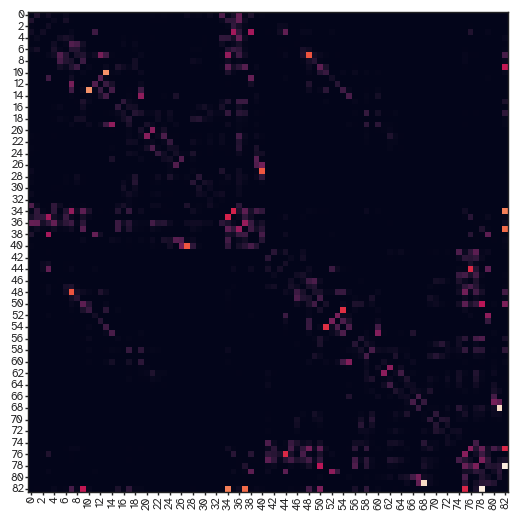

In [10]:
viz.plot_matrix(connectivity)

In [13]:
resource = connectivity.sum(0)/(connectivity.sum(0).max())

In [14]:
resource

array([0.18951207, 0.15779244, 0.07218922, 0.34685331, 0.17565699,
       0.1443028 , 0.19572214, 0.57257445, 0.18126792, 0.42521936,
       0.2738983 , 0.15894178, 0.20549952, 0.37859982, 0.20888385,
       0.17170261, 0.10893989, 0.2508863 , 0.13637519, 0.24177861,
       0.11974734, 0.2186794 , 0.10926324, 0.13076801, 0.11788861,
       0.13493294, 0.15036939, 0.17279419, 0.14048983, 0.10482264,
       0.04746418, 0.06957228, 0.013994  , 0.17726362, 0.71733687,
       0.40688491, 0.66771449, 0.54008548, 0.37108088, 0.23323339,
       0.3613734 , 0.19849579, 0.12360214, 0.05314004, 0.3380503 ,
       0.15432244, 0.16409406, 0.21337244, 0.51677158, 0.19649051,
       0.47206868, 0.22152295, 0.20348726, 0.2102517 , 0.31819818,
       0.21064156, 0.18960105, 0.11163344, 0.29073025, 0.14469631,
       0.20801299, 0.11005304, 0.20963763, 0.11859376, 0.11065041,
       0.09408706, 0.11922365, 0.18438465, 0.3033377 , 0.13113454,
       0.14402478, 0.0760641 , 0.09342239, 0.01757837, 0.25476

In [15]:
import numpy as np

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


<Axes: >

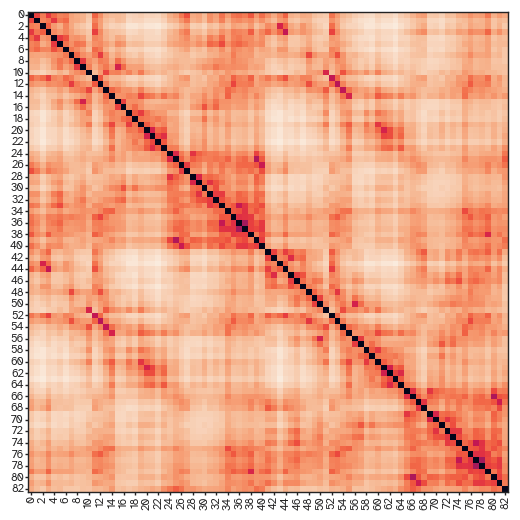

In [16]:
viz.plot_matrix(ut.log_normalize(euclidean_distance))

In [17]:
import seaborn as sns

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


<Axes: >

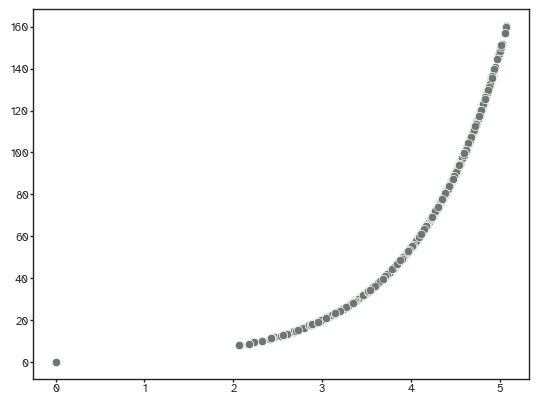

In [18]:
sns.scatterplot(x=ut.log_normalize(euclidean_distance).flatten(), y=euclidean_distance.flatten())

In [19]:
ut.find_density(connectivity)

np.float64(0.30976919727101176)

In [294]:
n_iterations = 2500
beta_vec = np.ones(n_iterations)
penalty_vec = np.zeros(n_iterations)
batch_size_vec = np.full(n_iterations, connectivity.shape[0])
payoff_tolerance_vec = 0.001 * (10 - np.exp(-2 * np.linspace(0, 1, n_iterations)))
weight = 0.1
resource_scaling = 1

In [295]:
result=gen.find_optimal_alpha(
    distance_matrix=euclidean_distance,
    empirical_connectivity=connectivity,
    distance_fn=gen.search_information,
    n_iterations=n_iterations, 
    alpha_range=(0.1, 100), 
    max_search_iterations=10,
    tolerance=0.01,
    payoff_tolerance=payoff_tolerance_vec,
    batch_size=batch_size_vec,
    node_resources=resource*resource_scaling,
    weight_coefficient=weight)

Simulating network evolution:   1%|          | 22/2499 [00:06<09:07,  4.52it/s] /Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative_game_theoric.py:740: RuntimeWarning: invalid value encountered in scalar subtract
  diff_i = new_payoff_i - old_payoff_i
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative_game_theoric.py:741: RuntimeWarning: invalid value encountered in scalar subtract
  diff_j = new_payoff_j - old_payoff_j
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative_game_theoric.py:740: RuntimeWarning: invalid value encountered in scalar subtract
  diff_i = new_payoff_i - old_payoff_i
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative_game_theoric.py:741: RuntimeWarning: invalid value encountered in scalar subtract
  diff_j = new_payoff_j - old_payoff_j
/Users/kf02/Library/Mobile Documents

KeyboardInterrupt: 

In [268]:
from scipy.stats import spearmanr

In [269]:
weighted_adj = gen._apply_weighting(result["evolution"][...,-1],euclidean_distance,weight)

In [270]:
for i in np.linspace(0,1,10):
    weighted_adj = gen._apply_weighting(result["evolution"][...,-1],euclidean_distance,i)
    print(spearmanr(connectivity.flatten(), weighted_adj.flatten()))

SignificanceResult(statistic=np.float64(0.4025317545298534), pvalue=np.float64(1.0275113541634317e-266))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4399113699447183), pvalue=np.float64(0.0))


/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  """


<Axes: >

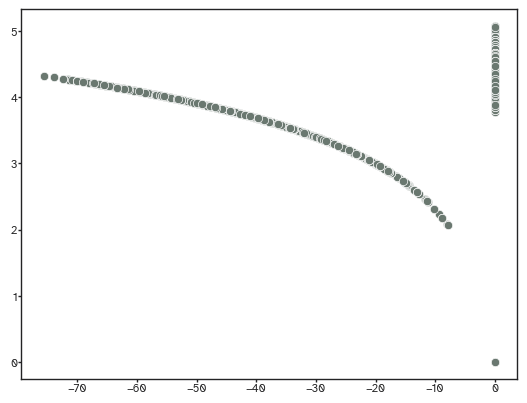

In [271]:
sns.scatterplot(x=ut.log_normalize(weighted_adj).flatten(),
 y=ut.log_normalize(euclidean_distance).flatten())

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  """


<Axes: >

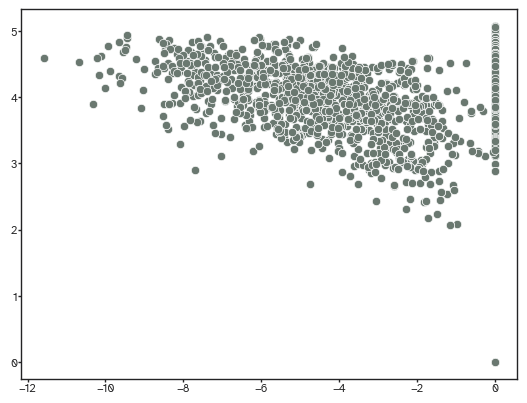

In [287]:
sns.scatterplot(x=ut.log_normalize(connectivity).flatten(),
 y=ut.log_normalize(euclidean_distance).flatten())

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  """


<Axes: >

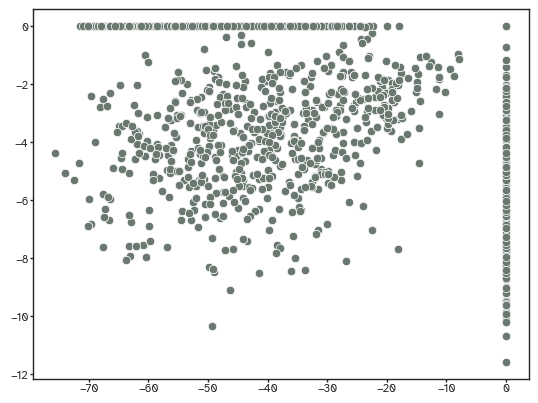

In [288]:
sns.scatterplot(x=ut.log_normalize(weighted_adj).flatten(),
 y=ut.log_normalize(connectivity).flatten())

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  """


<Axes: >

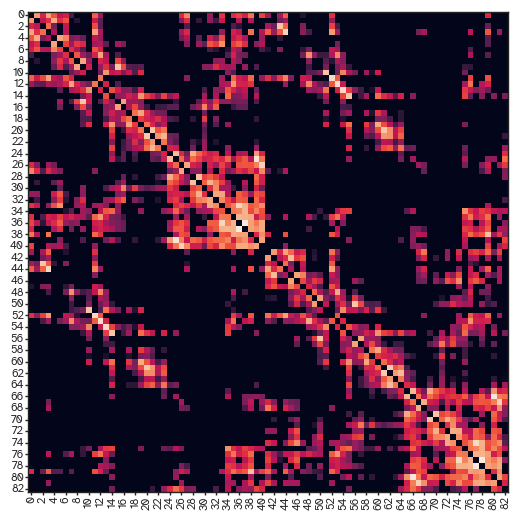

In [289]:
viz.plot_matrix(ut.log_minmax_normalize(weighted_adj))

In [290]:
import matplotlib.pyplot as plt

In [291]:
result.keys()

dict_keys(['alpha', 'density', 'evolution'])

In [292]:
densities = [ut.find_density(result["evolution"][...,i]) for i in range(result["evolution"].shape[-1])]

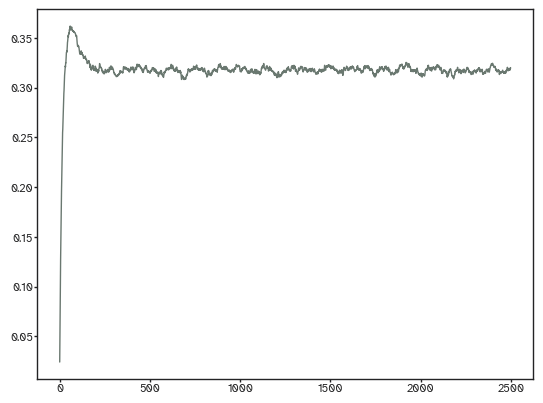

In [293]:
plt.plot(densities);

In [279]:
nets = gen.simulate_network_evolution(
            distance_matrix=euclidean_distance,
            n_iterations=n_iterations,
            distance_fn=gen.resistance_distance,
            alpha=result["alpha"],
            beta=beta_vec,
            connectivity_penalty=penalty_vec,
            n_jobs=-1,
            random_seed=11,
            batch_size=batch_size_vec,
            payoff_tolerance=payoff_tolerance_vec,
            weight_coefficient=weight,
            node_resources=resource*resource_scaling,
        )

Simulating network evolution: 100%|██████████| 2499/2499 [01:33<00:00, 26.80it/s]


In [280]:
densities = [ut.find_density(nets[...,i]) for i in range(nets.shape[-1])]

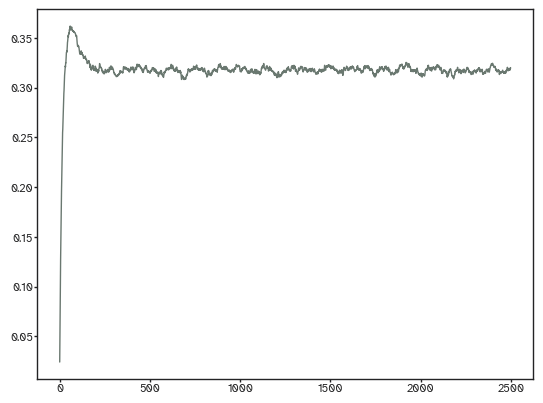

In [281]:
plt.plot(densities);

<Axes: >

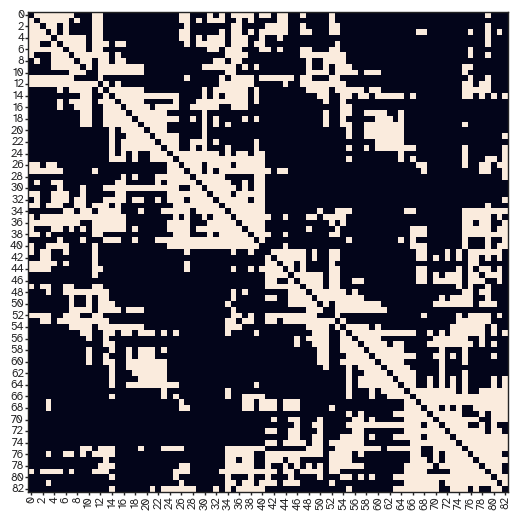

In [282]:
viz.plot_matrix(nets[...,-1])

<Axes: >

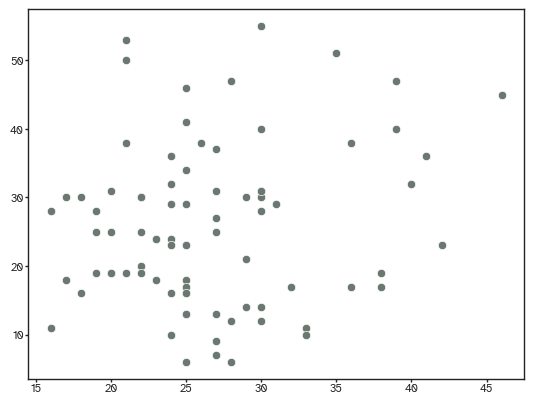

In [283]:
sns.scatterplot(x=nets[..., -1].sum(axis=1), 
y=connectivity.astype(bool).astype(int).sum(axis=1))

<Axes: >

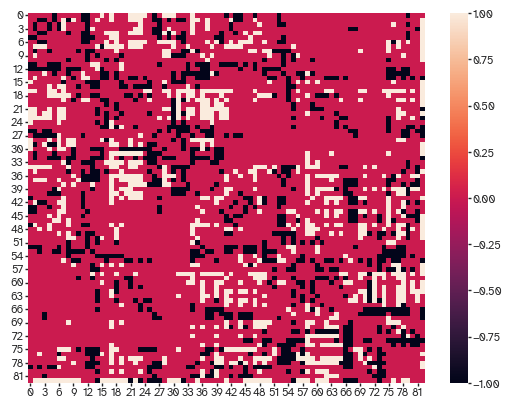

In [284]:
sns.heatmap(connectivity.astype(bool)-nets[...,-1])

In [285]:
from yanat.utils import calculate_endpoint_similarity
calculate_endpoint_similarity(connectivity.astype(bool).astype(int), nets[...,-1]).mean()

np.float64(0.5688938762349102)

In [286]:
spearmanr(nets[..., -1].sum(axis=1), connectivity.astype(bool).astype(int).sum(axis=1))

SignificanceResult(statistic=np.float64(0.07305719684851537), pvalue=np.float64(0.5115882267457887))